# The steps that we are doing on the data set are:
### 1.Data understanding and Data Cleaning
### 2.Data visualizing and Preparing data for modeling
### 3.Training the model
### 4.Lasso Regression
### 5.Ridge Regression

# 1.Data understanding and Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.impute import SimpleImputer

import sklearn.metrics as metrics

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

housing = pd.read_csv("train.csv", na_values="NAN")

In [3]:
# printing top 5 rows in dataset

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [8]:
# performing Auto EDA

import sweetviz as sv
sweet_report = sv.analyze(housing,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='SalePrice', ylabel='Density'>

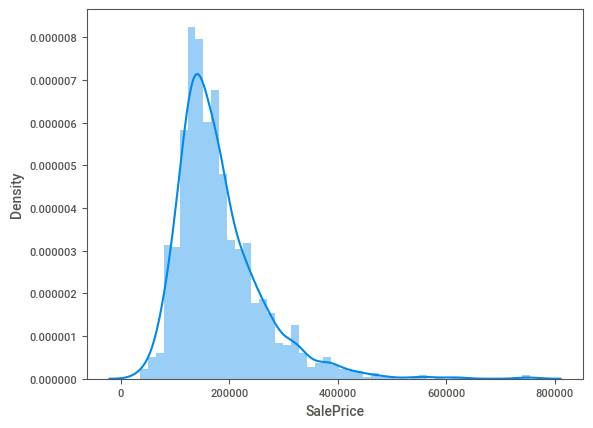

In [9]:
# displot for saleprice

sns.distplot(housing['SalePrice'])

In [10]:
housing['SalePrice'].skew()

1.8828757597682129

In [11]:
housing['SalePrice'].kurt()

6.536281860064529

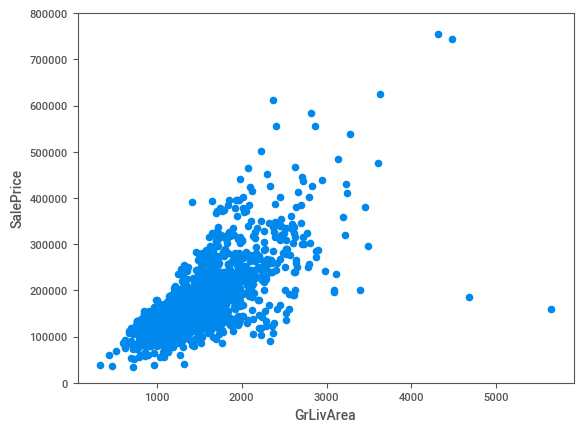

In [12]:
# scatter plot for GrLivArea with Saleprice

var = 'GrLivArea'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

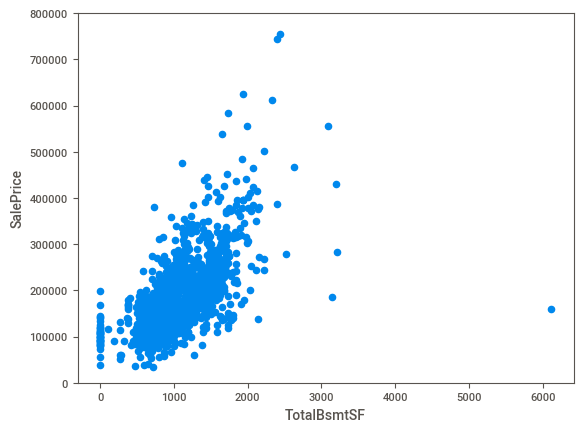

In [13]:
# scatter plot for TotalBsmtSF with SalePrice

var = 'TotalBsmtSF'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<Axes: >

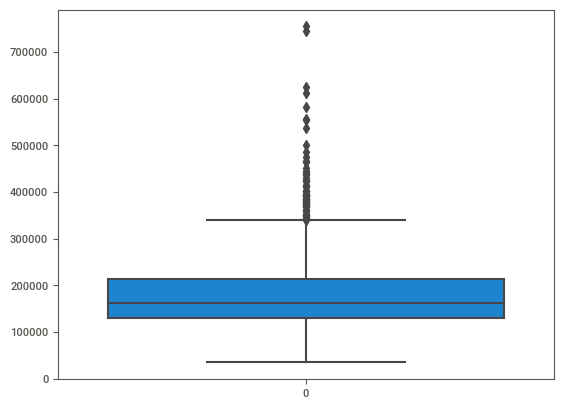

In [14]:
# boxplot for SalePrice

sns.boxplot(data['SalePrice'])

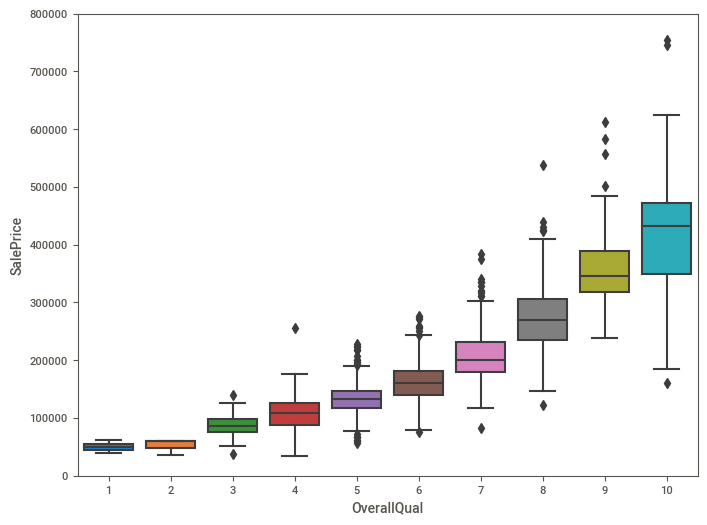

In [15]:
# box plot for overallqual with SalePrice

var = 'OverallQual'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

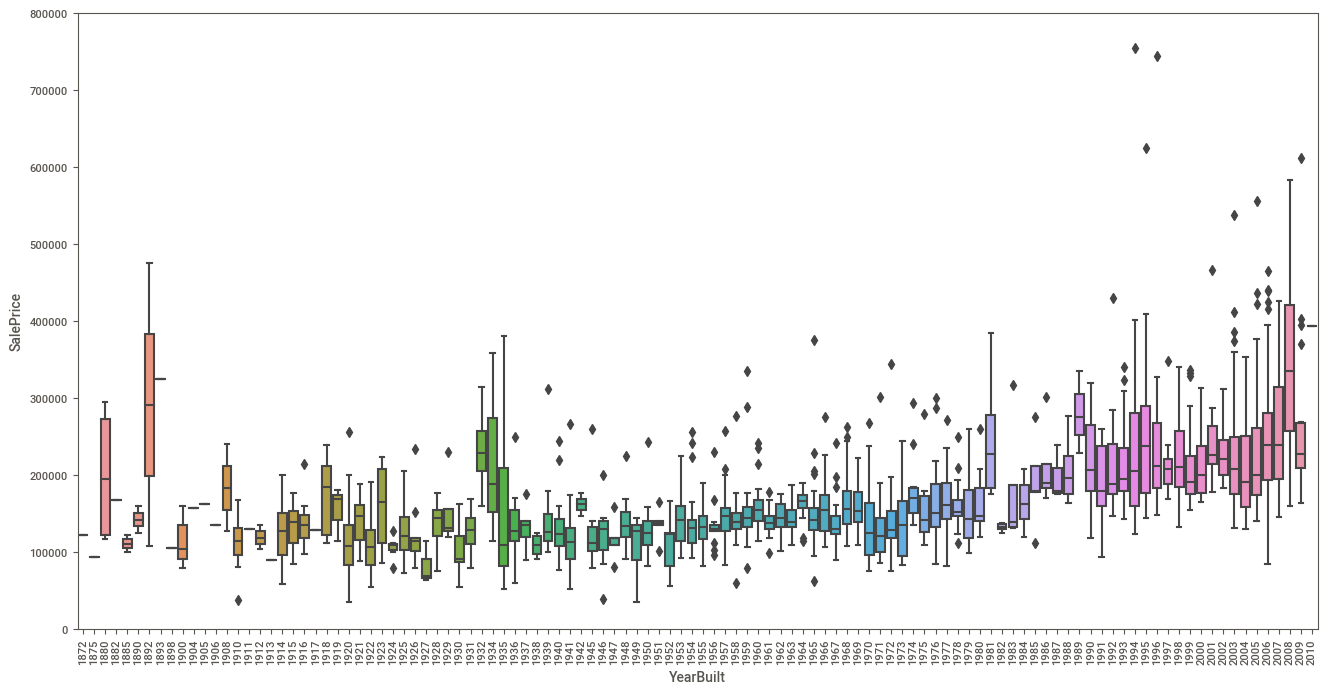

In [16]:
# box plot for YearBuilt with SalePrice

var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

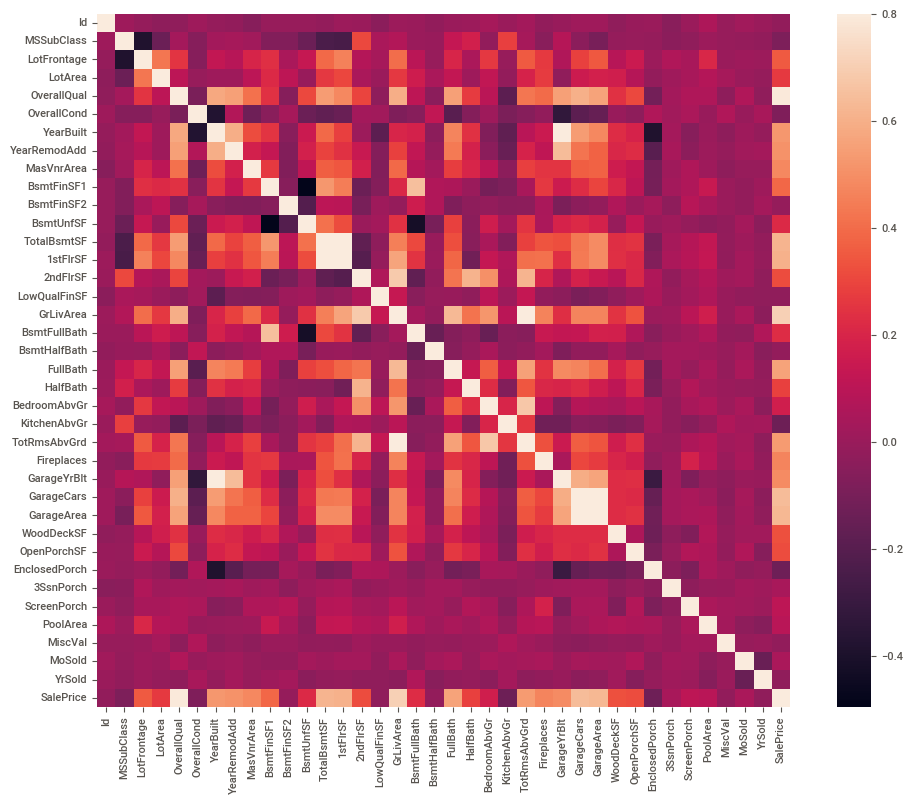

In [17]:
# correlation matrix for the list

corrmat = housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

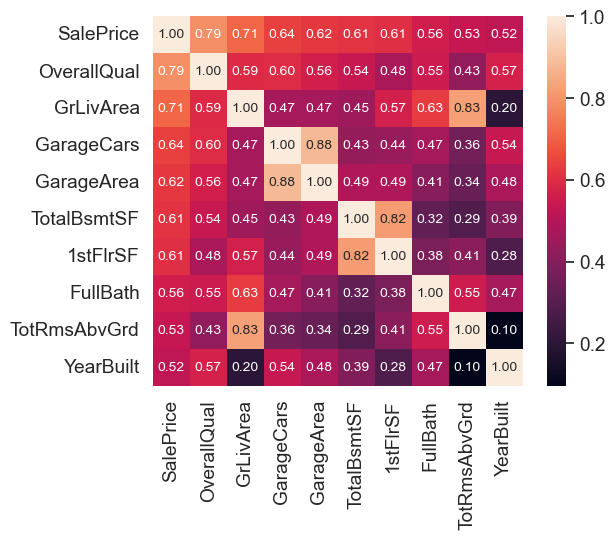

In [18]:
# saleprice correlation matrix

# number of variables for heatmap

k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

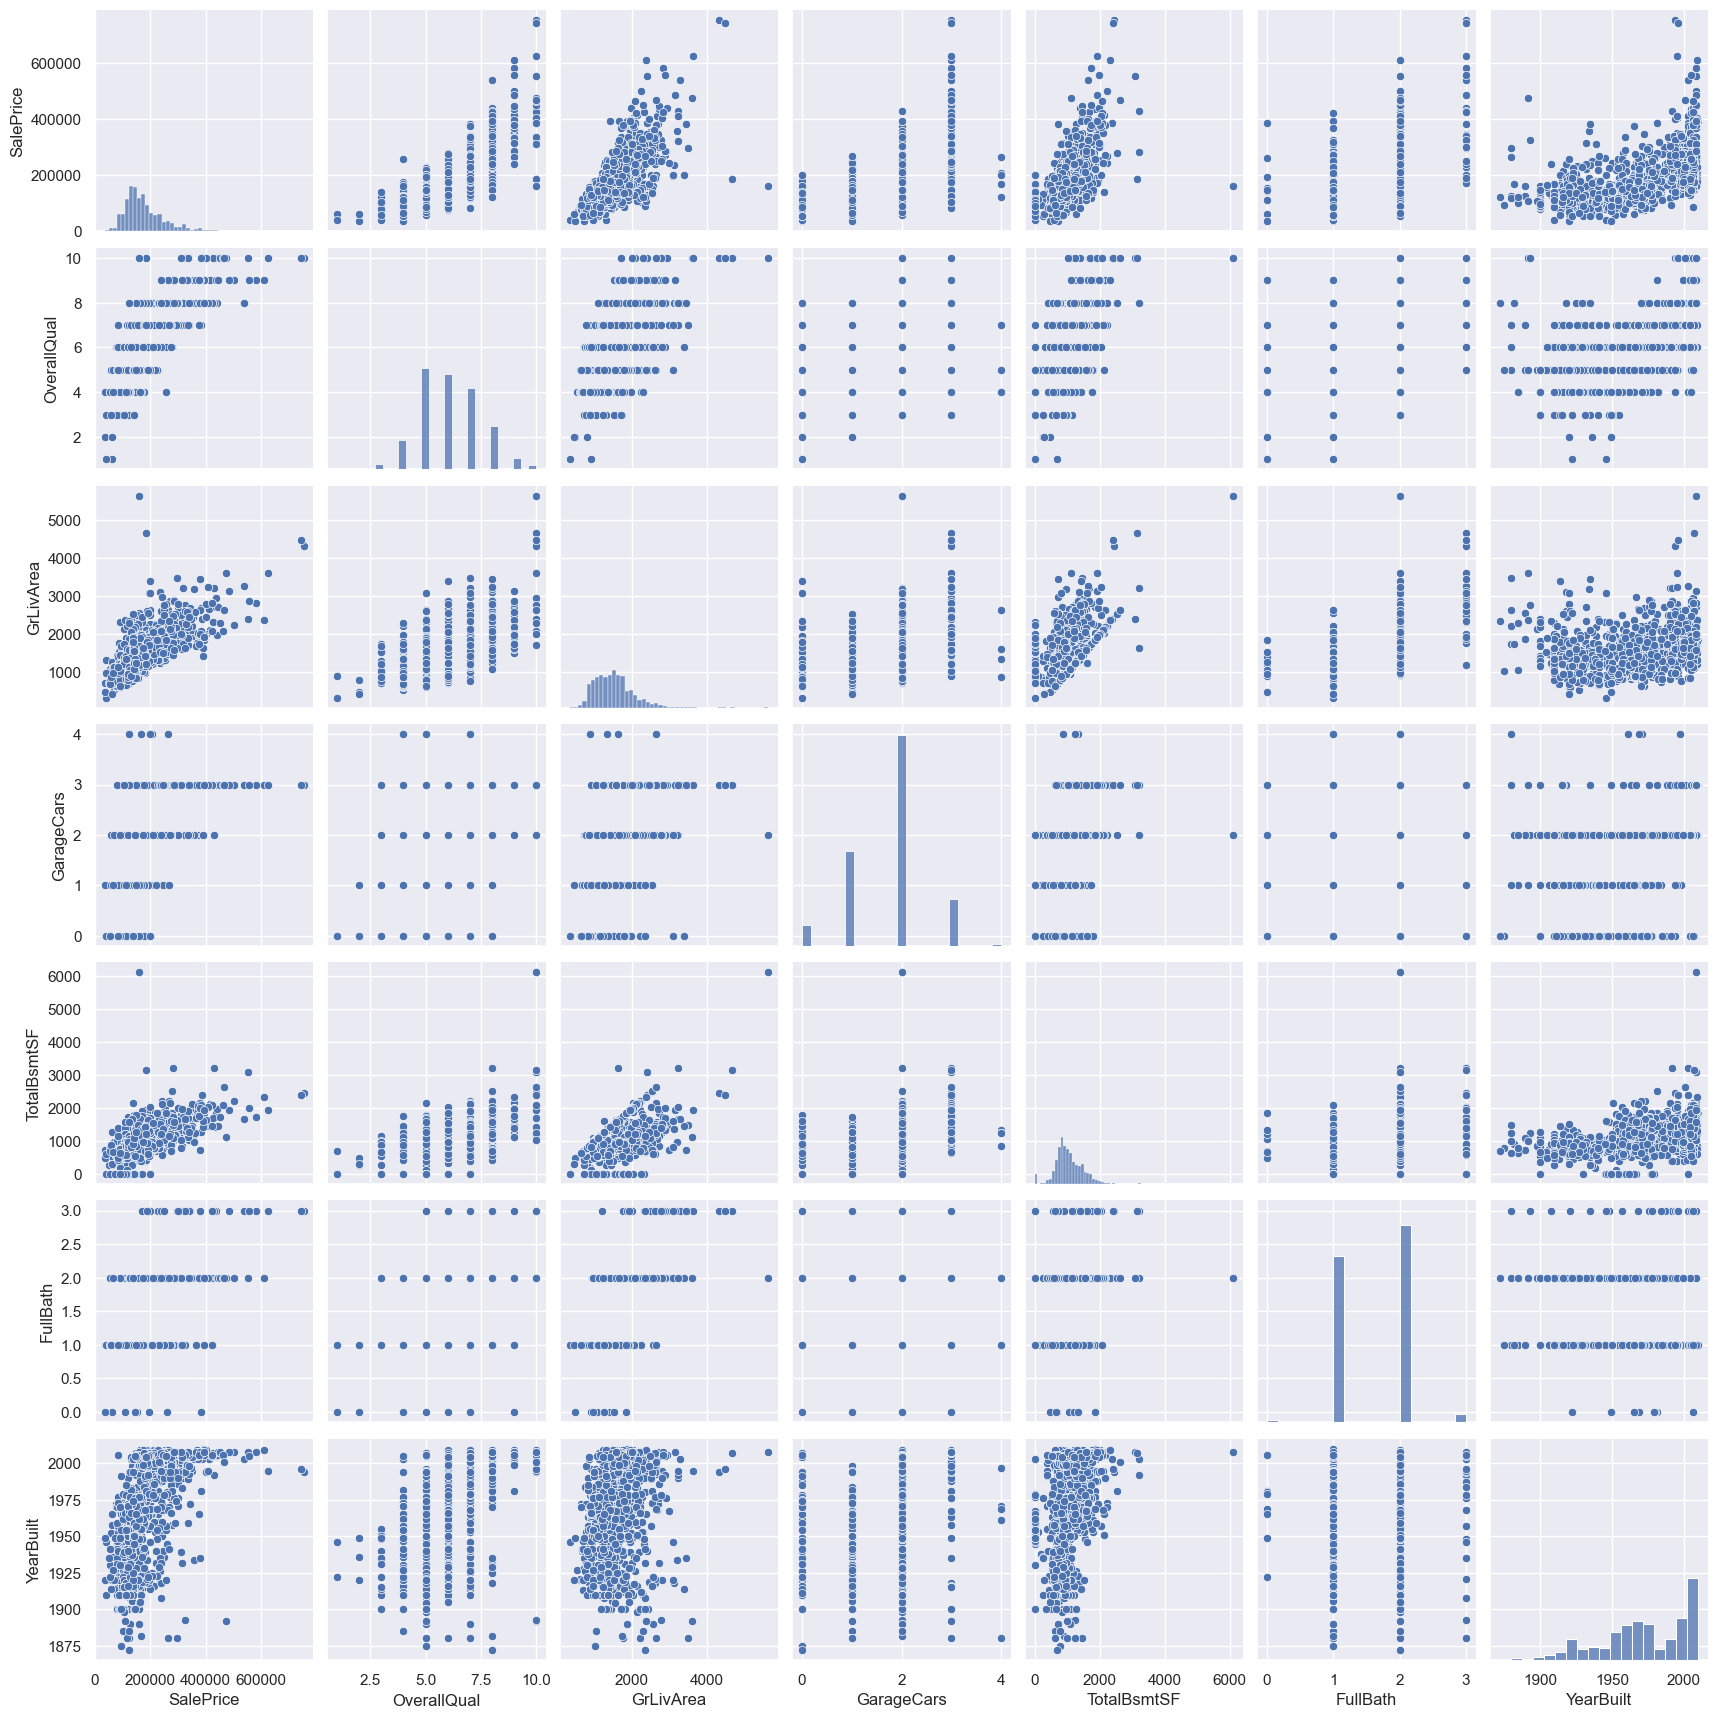

In [19]:
# scatterplot for the attributes
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols], size = 2.5)
plt.show();

### Finding missing data

In [20]:
# missing data in dataset

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [21]:
missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [22]:
# you can find these features on the description data file provided

null_with_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [23]:
for i in null_with_meaning:
    
    housing[i].fillna("None", inplace=True)
    housing[i].fillna("None", inplace=True)

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [26]:
# Again checking missing data

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [27]:
missing.head(6)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


In [28]:
# LotFrontage has large number of missing values its better to drop out

housing.drop("LotFrontage", axis=1, inplace=True)

In [29]:
# Once again checking missing data

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [30]:
missing.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


In [31]:
# GarageYrBlt, MasVnrArea, and MasVnrType all also have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.

housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].median(), inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace=True)
housing["MasVnrType"].fillna("None", inplace=True)

In [32]:
# checking missing data

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [33]:
missing.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


In [34]:
# Now that only one row has a null entry, we will drop the row.

housing.dropna(inplace=True)

In [35]:
# checking missing data

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [36]:
missing.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [38]:
# performing Auto EDA

sweet_report = sv.analyze(housing,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 2.Data visualizing and Preparing data for modeling

In [39]:
# Now we will determine the data type of all features remaining

# type of each feature in data: int, float, object

types_train = housing.dtypes 

In [40]:
# numerical values are either type int or float

num_train = types_train[(types_train == 'int64') | (types_train == float)] 

In [41]:
# categorical values are type object

cat_train = types_train[types_train == object] 

In [42]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [43]:
# we should convert num_train to a list to make it easier to work with

numeric_values_train = list(num_train.index)

In [44]:
numeric_values_train

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [45]:
categoric_values_train = list(cat_train.index)
categoric_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<Axes: xlabel='SalePrice', ylabel='Density'>

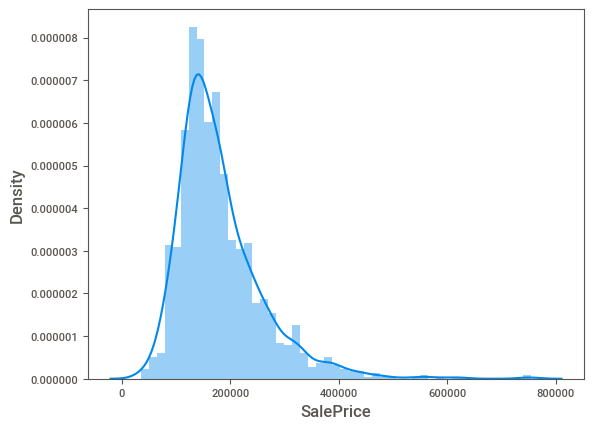

In [46]:
sns.distplot(housing["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

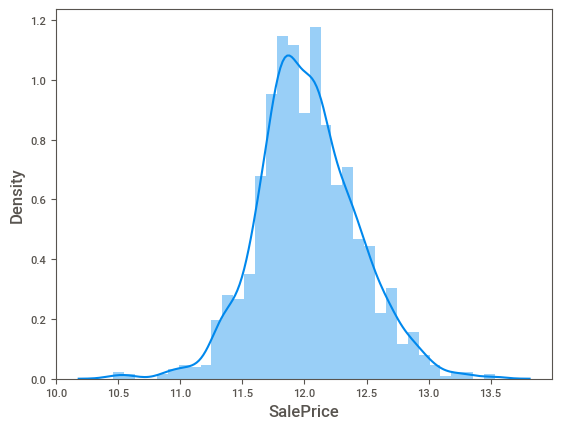

In [47]:
sns.distplot(np.log(housing["SalePrice"]))

In [48]:
housing["TransformedPrice"] = np.log(housing["SalePrice"])

In [49]:
categoric_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [50]:
for i in categoric_values_train:
    feature_set = set(housing[i])
    for j in feature_set:
        feature_list = list(feature_set)
        housing.loc[housing[i] == j, i] = feature_list.index(j)

In [51]:
housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,4,8450,0,0,3,3,1,1,...,1,0,0,0,2,2008,7,0,208500,12.247694
1,2,20,4,9600,0,0,3,3,1,0,...,1,0,0,0,5,2007,7,0,181500,12.109011
2,3,60,4,11250,0,0,2,3,1,1,...,1,0,0,0,9,2008,7,0,223500,12.317167
3,4,70,4,9550,0,0,2,3,1,3,...,1,0,0,0,2,2006,7,4,140000,11.849398
4,5,60,4,14260,0,0,2,3,1,0,...,1,0,0,0,12,2008,7,0,250000,12.429216


# 3.Training the model

In [52]:
X = housing.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y = housing["TransformedPrice"].values

In [53]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [54]:
# Unregularized Model

lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9155389272715508
Testing R2
-0.11850861545667257


In [55]:
# If alpha=0 then overfitting [Unregularised Model]

# Higher the alpha more the regularization more the underfitting
# Lower the alpha lesser the regularization more the overfitting

lr = Lasso(alpha=0.9)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.775065247417162
Testing R2
0.7619793903561821


In [56]:
lr.coef_

array([-4.20969078e-05,  0.00000000e+00,  1.35881699e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.71041429e-03,  1.30624720e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.79127629e-05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.96254507e-05,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.73046785e-04,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.67855664e-05, -0.00000000e+00,
        2.80415760e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [57]:
# Generate a list of 50 values between 0 and 1.5

params = {'alpha': np.linspace(0.2, 0.6 , num = 100) }

In [58]:
# list of alphas to tune

params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# 4.Lasso Regression

In [59]:
# Applying Lasso

lasso = Lasso()

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036115,0.024042,0.000000,0.000000,0.0,{'alpha': 1e-08},0.921188,0.883803,0.813662,-0.083028,...,0.685426,0.385842,18,0.911446,0.919090,0.931983,0.915568,0.913670,0.918351,0.007262
1,0.024562,0.022078,0.003068,0.006136,0.0,{'alpha': 1e-07},0.921188,0.883804,0.813663,-0.068174,...,0.688398,0.379927,17,0.911446,0.919090,0.931983,0.915568,0.913670,0.918351,0.007262
2,0.024283,0.024111,0.007278,0.008042,0.000001,{'alpha': 1e-06},0.921187,0.883815,0.813675,0.074158,...,0.716880,0.323291,13,0.911446,0.919090,0.931983,0.915563,0.913670,0.918350,0.007263
3,0.015781,0.007927,0.001603,0.003206,0.00001,{'alpha': 1e-05},0.921175,0.883924,0.813797,0.619061,...,0.826016,0.109324,3,0.911445,0.919089,0.931981,0.915515,0.913669,0.918340,0.007266
4,0.007765,0.006594,0.004966,0.005109,0.0001,{'alpha': 0.0001},0.920953,0.884911,0.815075,0.616369,...,0.826911,0.111016,1,0.911342,0.918983,0.931891,0.915414,0.913603,0.918246,0.007266


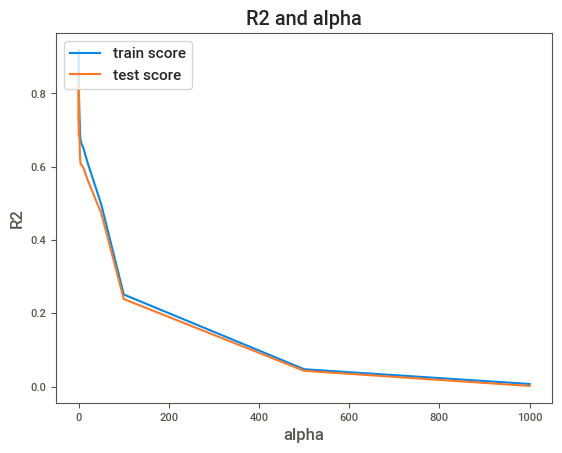

In [61]:
# plotting mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
alpha = 0.5

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [63]:
lasso.coef_

array([-3.39340955e-04,  0.00000000e+00,  1.52798565e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.90887169e-03,  2.27090254e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.62095707e-05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.12883923e-05,  0.00000000e+00,  4.69014926e-06, -4.66798925e-07,
        1.58214667e-04,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.54730026e-05, -0.00000000e+00,
        2.83702844e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

# 5.Ridge Regression

In [64]:
# Applying Ridge

ridge = Ridge()

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015683,0.002395,0.002405,0.001588,0.0,{'alpha': 1e-08},-0.086000,-0.096944,-0.101005,-0.114116,...,-0.097429,0.009918,20,-0.083328,-0.080488,-0.074755,-0.082278,-0.082281,-0.080626,0.003074
1,0.011422,0.003278,0.004111,0.003821,0.0,{'alpha': 1e-07},-0.086000,-0.096944,-0.101005,-0.114116,...,-0.097429,0.009918,19,-0.083328,-0.080488,-0.074755,-0.082278,-0.082281,-0.080626,0.003074
2,0.009815,0.001834,0.002127,0.001107,0.000001,{'alpha': 1e-06},-0.086000,-0.096944,-0.101005,-0.114110,...,-0.097428,0.009916,18,-0.083328,-0.080488,-0.074755,-0.082278,-0.082281,-0.080626,0.003074
3,0.009399,0.002540,0.003351,0.002447,0.00001,{'alpha': 1e-05},-0.086000,-0.096944,-0.101005,-0.114053,...,-0.097416,0.009897,17,-0.083328,-0.080488,-0.074755,-0.082278,-0.082281,-0.080626,0.003074
4,0.011740,0.004714,0.003170,0.003453,0.0001,{'alpha': 0.0001},-0.086001,-0.096944,-0.101005,-0.113507,...,-0.097307,0.009714,15,-0.083328,-0.080488,-0.074755,-0.082281,-0.082281,-0.080627,0.003075


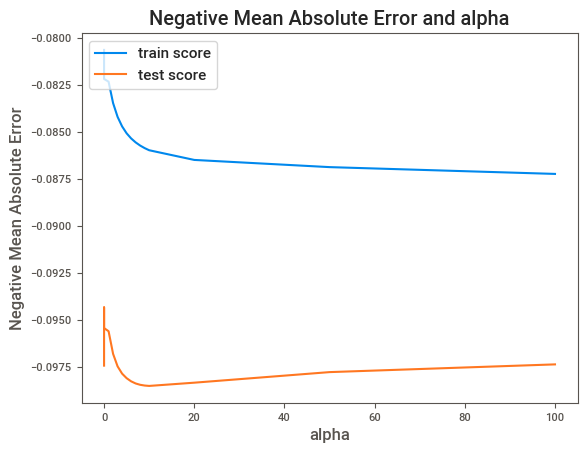

In [66]:
# plotting mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13478686e-04,  2.21928100e-02,  2.10848947e-06, -6.22142818e-02,
        2.33682044e-02,  5.43324343e-03, -5.34012305e-03,  1.12044515e-02,
        5.39407844e-03, -1.74000221e-02,  1.47304607e-03,  1.65288928e-02,
        7.23937328e-02, -2.25627280e-02,  7.69412485e-03,  6.89882986e-02,
        4.60445380e-02,  2.39120497e-03,  7.64910821e-04,  8.75913969e-03,
        1.42379479e-02, -3.92820963e-03,  1.59976819e-03, -1.94419173e-03,
        2.53014957e-05,  1.38326276e-02,  8.19792095e-03,  4.70813783e-03,
       -2.95429964e-02,  8.90991773e-03,  5.37290903e-03,  5.26166913e-03,
        4.19459893e-05, -5.69950711e-04,  1.72058701e-05,  7.99735839e-06,
        6.71492219e-05,  1.20387408e-02, -1.34016548e-02, -4.83691218e-02,
       -9.22435521e-04,  5.56327154e-06,  6.08960870e-05,  1.15640215e-04,
        1.82099570e-04,  5.08363893e-02,  2.17959204e-02,  3.51952243e-02,
        1.84045060e-02, -8.11014074e-03, -5.15048325e-02, -1.01639934e-02,
        9.20011222e-03,  

In [68]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

lr = RandomForestRegressor()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9826723499876958
Testing R2
0.8585544805345594
